In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv('AirQualityUCI.csv', sep=';' , decimal=',')
df.replace(-200,pd.NA, inplace=True)
df.drop('Unnamed: 15', axis=1, inplace=True)
df.drop('Unnamed: 16', axis=1, inplace=True)
df.drop('NMHC(GT)', axis=1, inplace=True)

In [5]:
df['Time'] = df['Time'].str.replace(".", ":", regex=False)

In [6]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                format=  '%d/%m/%Y %H:%M:%S')

In [7]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         7674 non-null   object        
 1   PT08.S1(CO)    8991 non-null   object        
 2   C6H6(GT)       8991 non-null   object        
 3   PT08.S2(NMHC)  8991 non-null   object        
 4   NOx(GT)        7718 non-null   object        
 5   PT08.S3(NOx)   8991 non-null   object        
 6   NO2(GT)        7715 non-null   object        
 7   PT08.S4(NO2)   8991 non-null   object        
 8   PT08.S5(O3)    8991 non-null   object        
 9   T              8991 non-null   object        
 10  RH             8991 non-null   object        
 11  AH             8991 non-null   object        
 12  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(12)
memory usage: 962.0+ KB


In [9]:
for col in df.columns:
    if col!='Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         6941 non-null   float64       
 1   PT08.S1(CO)    6941 non-null   float64       
 2   C6H6(GT)       6941 non-null   float64       
 3   PT08.S2(NMHC)  6941 non-null   float64       
 4   NOx(GT)        6941 non-null   float64       
 5   PT08.S3(NOx)   6941 non-null   float64       
 6   NO2(GT)        6941 non-null   float64       
 7   PT08.S4(NO2)   6941 non-null   float64       
 8   PT08.S5(O3)    6941 non-null   float64       
 9   T              6941 non-null   float64       
 10  RH             6941 non-null   float64       
 11  AH             6941 non-null   float64       
 12  Datetime       6941 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 759.2 KB


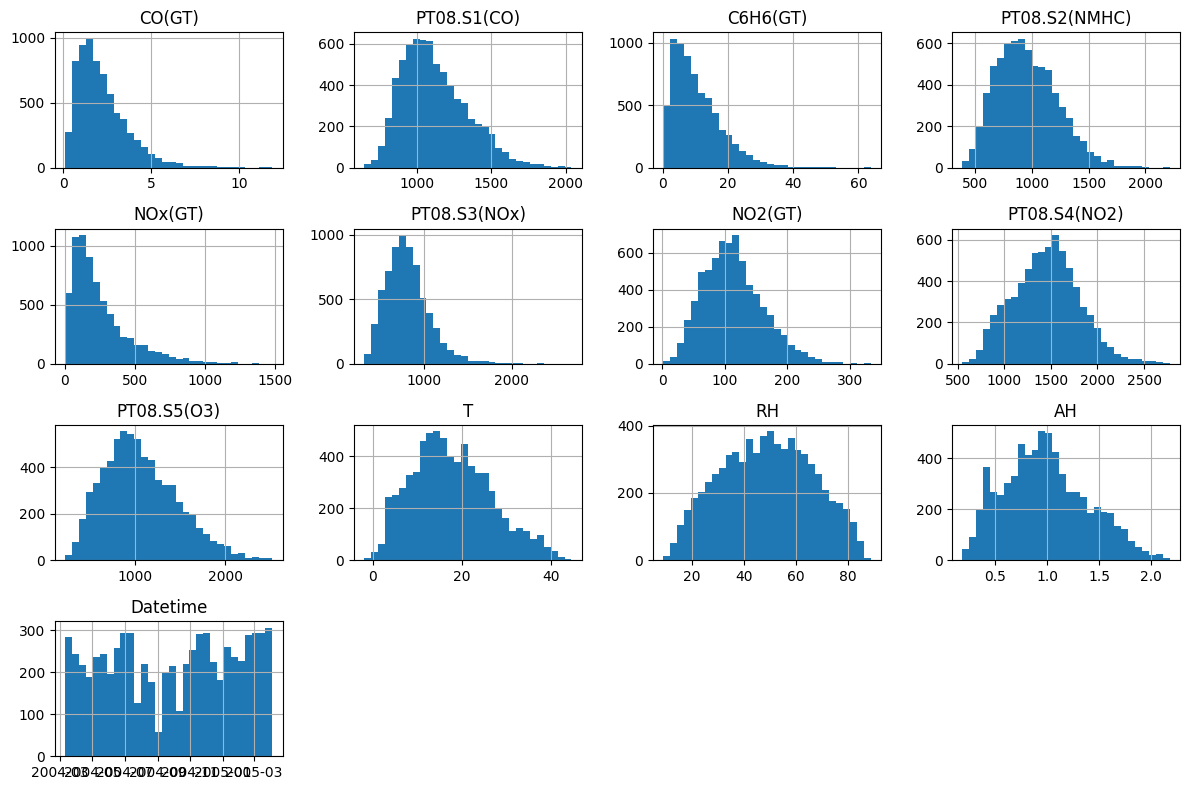

In [11]:
df.hist(figsize=(12,8) , bins=30)
plt.tight_layout()
plt.show()

In [12]:
print(df.describe())

            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  6941.000000  6941.000000  6941.000000    6941.000000  6941.000000   
mean      2.182467  1119.913269    10.554488     958.543005   250.671949   
min       0.100000   647.000000     0.200000     390.000000     2.000000   
25%       1.100000   956.000000     4.900000     760.000000   103.000000   
50%       1.900000  1085.000000     8.800000     931.000000   186.000000   
75%       2.900000  1254.000000    14.600000    1135.000000   335.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.441158   218.733754     7.465226     264.055002   208.611371   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   6941.000000  6941.000000   6941.000000  6941.000000  6941.000000   
mean     816.893387   113.874082   1452.648898  1057.756519    17.755323   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      64

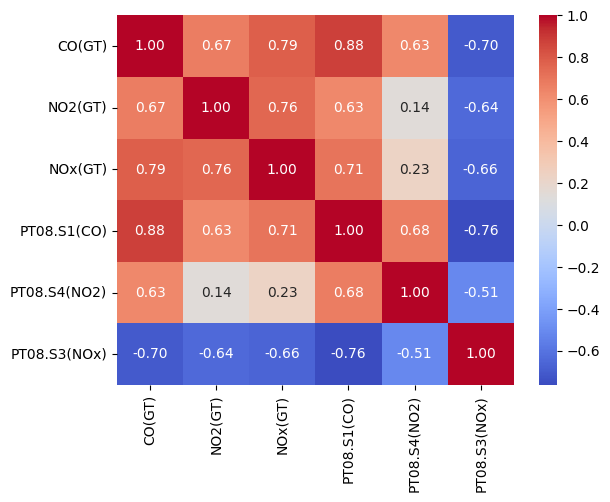

In [13]:
poluentes = ['CO(GT)','NO2(GT)','C6H6(GT)','PT08.S4(NO2)','NOx(GT)', 'T', 'RH', 'NOx(GT)']

ambiente = ['T', 'RH', 'AH']

sensores = ['CO(GT)','NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)', 'PT08.S4(NO2)', 'PT08.S3(NOx)']


corrmat = df[sensores].corr()

sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [14]:
poluente = ['NO2(GT)']

alvo = ['C6H6(GT)']

x = df[poluente]
y = df[alvo]

In [15]:
sensor = ['PT08.S3(NOx)']
alvo = ['NOx(GT)']

x_sensor = 1 / df[sensor]
y_sensor = df[alvo]

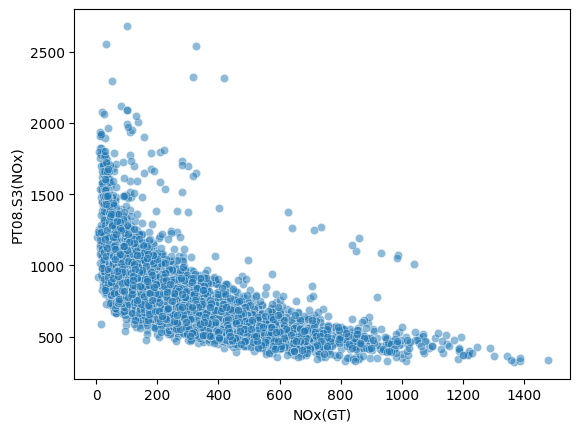

In [16]:
sns.scatterplot(x=df['NOx(GT)'],y=df['PT08.S3(NOx)'], alpha=0.5)
plt.show()

In [17]:
x_sm = sm.add_constant(x)

model_sm = sm.OLS(y_sensor, x_sensor).fit()

print(model_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                NOx(GT)   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          2.487e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):                        0.00
Time:                        22:14:02   Log-Likelihood:                         -44734.
No. Observations:                6941   AIC:                                  8.947e+04
Df Residuals:                    6940   BIC:                                  8.948e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [18]:
df['hora']=df['Datetime'].dt.hour

poluentesMedia = ['CO(GT)', 'C6H6(GT)']
mediaHora = df.groupby('hora')[poluentesMedia].mean()

In [19]:
mediaHora

,CO(GT),C6H6(GT)
hora,,
0,1.760714,7.804545
1,1.450825,6.112211
2,1.081728,4.458804
3,0.788000,2.700000
4,0.740828,2.972781
5,0.700000,3.049338
6,0.910492,4.630492
7,1.818954,9.838235
8,2.828383,15.191419


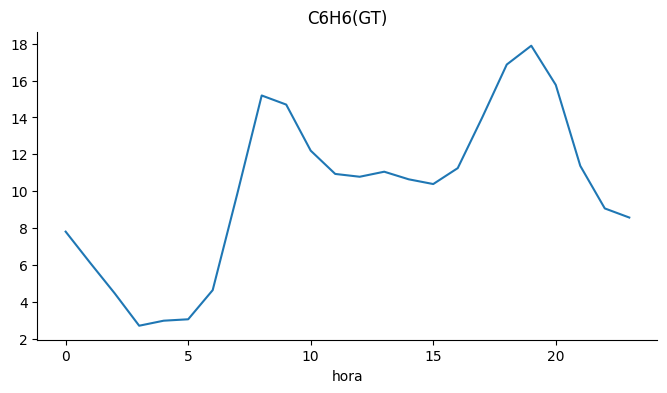

In [20]:
mediaHora['C6H6(GT)'].plot(kind='line', figsize=(8,4), title='C6H6(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

Encontrar o comportamento dos poluentes no final de semana comparando com os dias de semana
- Poluentes: CO, C6H6, NO2, NOx, O3

- a) Modelar a medida de O3 em relacao aos demais poluentes: CO, NOx, NO2, C6H6
- b) Avaliar se outras variaveis ambientais ajudam a explicar as concentracoes de C6H6 em funcao do sensor de O3

In [21]:
dateTime = df[['Datetime']]
dateTime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  6941 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 108.5 KB


In [22]:
df['Datetime']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: Datetime, Length: 6941, dtype: datetime64[ns]

In [23]:
df.copy()
df['diaSemana'] = df['Datetime'].dt.weekday 
filtroFinalSemana =  (df[df['diaSemana'] > 4])

filtroSemana =  (df[df['diaSemana'] <= 4])

In [24]:
poluentes = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S5(O3)']
mediaHoraFS = filtroFinalSemana.groupby('hora')[poluentes].mean()
mediaHoraS = filtroSemana.groupby('hora')[poluentes].mean()
mediaHoraFS

,CO(GT),C6H6(GT),NOx(GT),PT08.S5(O3)
hora,,,,
0,2.206452,9.386022,246.118280,1127.483871
1,1.819565,7.497826,207.934783,1025.673913
2,1.388043,5.794565,156.228261,911.815217
3,0.900000,3.700000,140.750000,813.875000
4,0.932000,4.078000,108.540000,792.820000
5,0.796703,3.410989,90.879121,735.010989
6,0.784783,3.727174,103.000000,759.163043
7,1.038462,5.036264,139.604396,834.736264
8,1.398925,6.930108,191.924731,925.397849


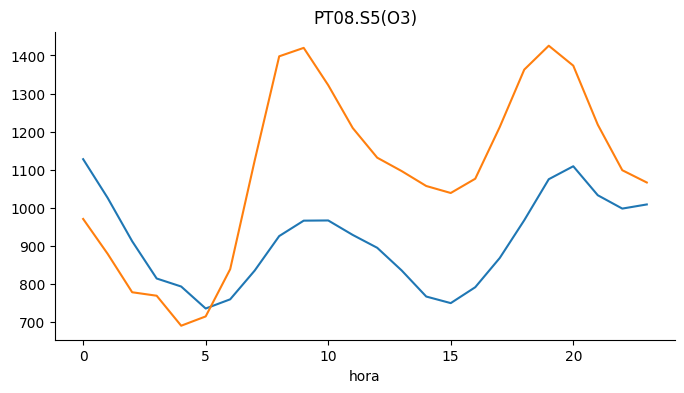

In [25]:
from matplotlib import pyplot as plt
mediaHoraFS['PT08.S5(O3)'].plot(kind='line', figsize=(8, 4), title='PT08.S5(O3)')
mediaHoraS['PT08.S5(O3)'].plot(kind='line', figsize=(8, 4), title='PT08.S5(O3)')
plt.gca().spines[['top', 'right']].set_visible(False)

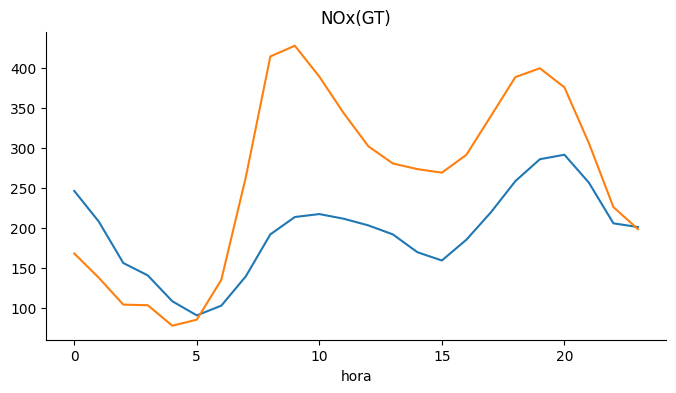

In [26]:
from matplotlib import pyplot as plt
mediaHoraFS['NOx(GT)'].plot(kind='line', figsize=(8, 4), title='NOx(GT)')
mediaHoraS['NOx(GT)'].plot(kind='line', figsize=(8, 4), title='NOx(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

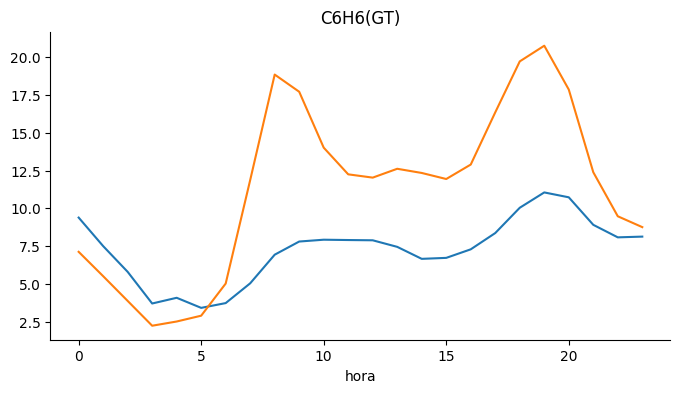

In [27]:
from matplotlib import pyplot as plt
mediaHoraFS['C6H6(GT)'].plot(kind='line', figsize=(8, 4), title='C6H6(GT)')
mediaHoraS['C6H6(GT)'].plot(kind='line', figsize=(8, 4), title='C6H6(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

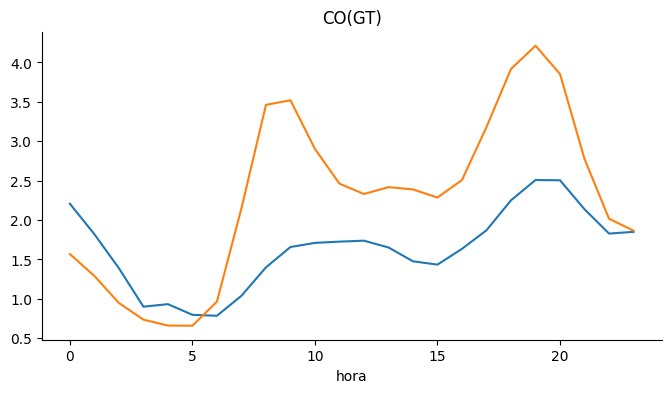

In [28]:
from matplotlib import pyplot as plt
mediaHoraFS['CO(GT)'].plot(kind='line', figsize=(8, 4), title='CO(GT)')
mediaHoraS['CO(GT)'].plot(kind='line', figsize=(8, 4), title='CO(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

Modelo de O3:
                            OLS Regression Results                            
Dep. Variable:            PT08.S5(O3)   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6031.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:15:02   Log-Likelihood:                -45728.
No. Observations:                6941   AIC:                         9.147e+04
Df Residuals:                    6935   BIC:                         9.151e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        438.0488      6.453     6

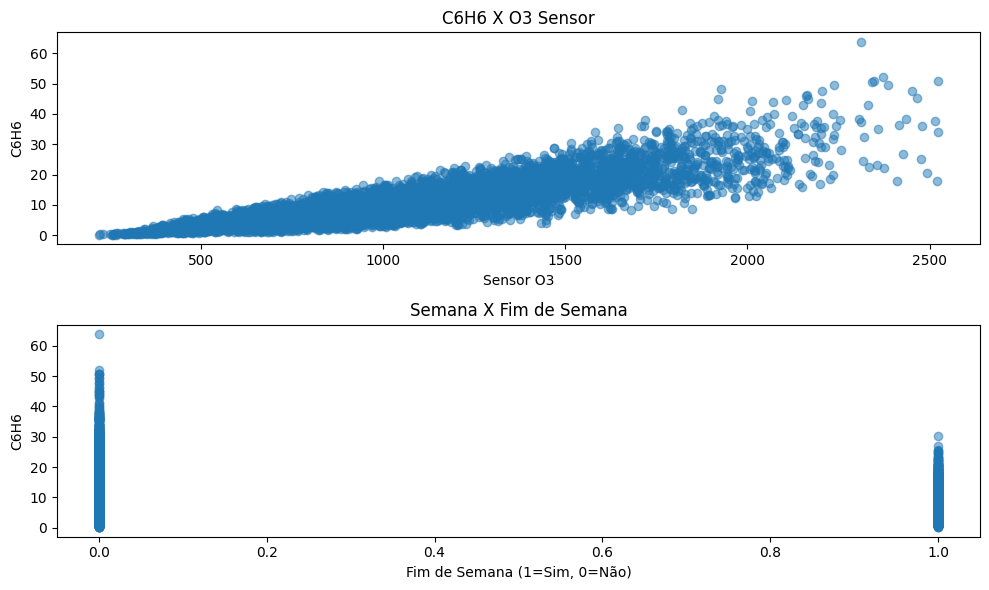

In [32]:
# Função para preparar os dados
def prepare_data(df):
    # Extrair a coluna weekday e criar a coluna weekend
    df['weekday'] = df['Datetime'].dt.dayofweek
    df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
    return df

# Função para modelar O3 em relação aos outros poluentes
def model_o3(df):
    y = df['PT08.S5(O3)']  # Variável dependente (O3)
    X = df[['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'weekend']]  # Variáveis independentes
    X = sm.add_constant(X)  # Adiciona uma constante para o modelo

    model = sm.OLS(y, X).fit()  # Ajusta o modelo de regressão
    print("Modelo de O3:")
    print(model.summary())  # Exibe o resumo do modelo

# Função para modelar C6H6 em relação ao sensor de O3 e outras variáveis ambientais
def model_c6h6(df):
    y = df['CO(GT)']  # Variável dependente (CO)
    X = df[['NO2(GT)', 'T', 'RH', 'AH', 'weekend']]  # Variáveis independentes
    X = sm.add_constant(X)  # Adiciona uma constante para o modelo

    model = sm.OLS(y, X).fit()  # Ajusta o modelo de regressão
    print("\nModelo de C6H6:")
    print(model.summary())  # Exibe o resumo do modelo

# Função para gerar os gráficos
def plot_graphs(df):
    # Plot 1: Correlação entre O3 e C6H6
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.scatter(df['PT08.S5(O3)'], df['C6H6(GT)'], alpha=0.5)
    plt.title('C6H6 X O3 Sensor')
    plt.xlabel('Sensor O3')
    plt.ylabel('C6H6')

    # Plot 2: Comparação de C6H6 nos dias de semana vs. fim de semana
    plt.subplot(2, 1, 2)
    plt.scatter(df['weekend'], df['C6H6(GT)'], alpha=0.5)
    plt.title('Semana X Fim de Semana')
    plt.xlabel('Fim de Semana (1=Sim, 0=Não)')
    plt.ylabel('C6H6')

    plt.tight_layout()
    plt.show()

# Main: Preparando os dados, modelando e plotando gráficos
def main(df):
    df = prepare_data(df)  # Preparar os dados
    model_o3(df)  # Modelar O3
    model_c6h6(df)  # Modelar C6H6
    plot_graphs(df)  # Gerar gráficos
main(df)